In [1]:
import pandas as pd
import sqlite3
import seaborn as sns

<Axes: xlabel='internal_duration_micro_seconds', ylabel='total_duration_micro_seconds'>

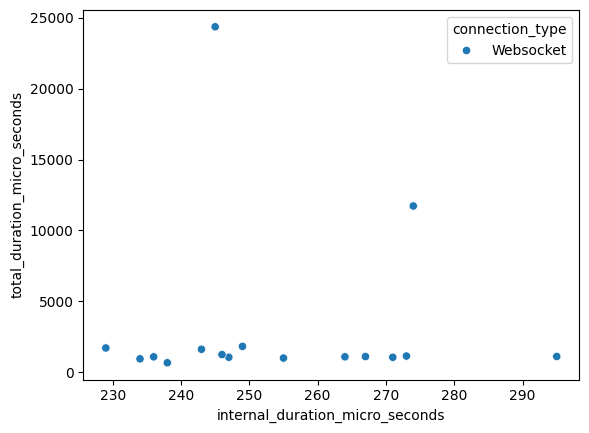

In [20]:
conn = sqlite3.connect('results/1w_10min.sqlite')
query = "SELECT * FROM results WHERE connection_type = 'Websocket' AND query_type = 'create'"
df = pd.read_sql_query(query,conn)
sns.scatterplot(data=df, x="internal_duration_micro_seconds", y="total_duration_micro_seconds", hue="connection_type") 

<Axes: xlabel='connection_type', ylabel='total_duration_micro_seconds'>

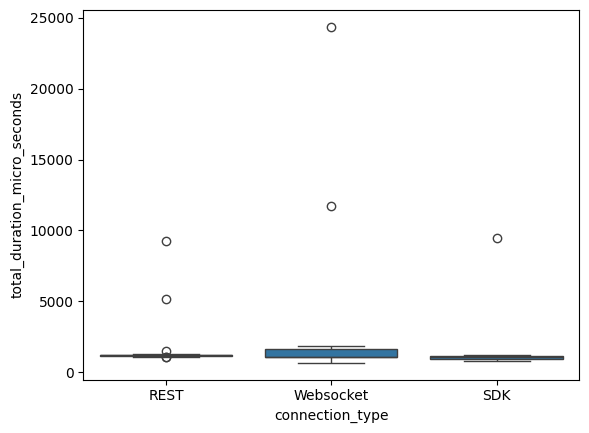

In [27]:
query = "SELECT * FROM results WHERE query_type = 'create'"
df = pd.read_sql_query(query,conn)
sns.boxplot(x="connection_type", y="total_duration_micro_seconds", data=df) 